### Initial processing

In [1]:
import pandas as pd

df = pd.read_csv("./data/used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [2]:
print(len(df))
print(df.shape)

4009
(4009, 12)


In [6]:
df["model_year"]

0       2013
1       2021
2       2022
3       2015
4       2021
        ... 
4004    2023
4005    2022
4006    2022
4007    2020
4008    2020
Name: model_year, Length: 4009, dtype: int64

<Axes: >

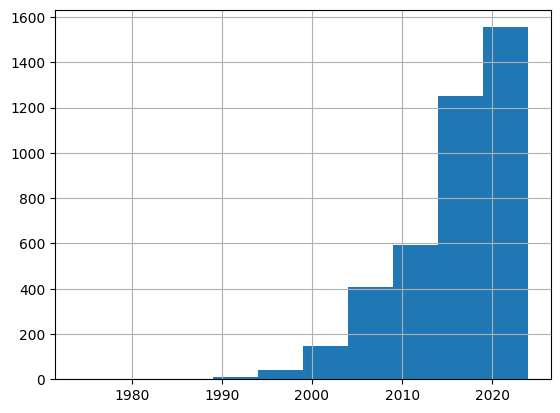

In [ ]:
df["model_year"].hist()

<Axes: >

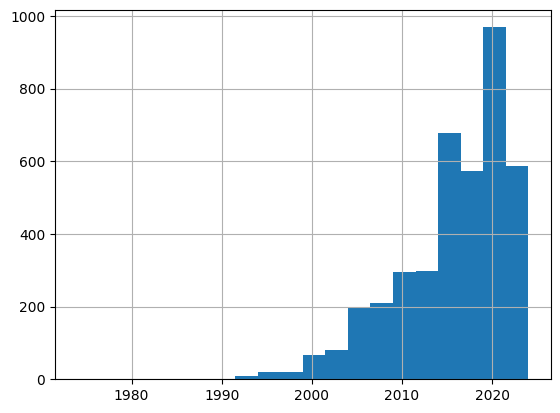

In [4]:
df["model_year"].hist(bins=20)

In [8]:
print(df["model_year"].mean())
print(df["model_year"].min())
print(df["model_year"].max())

2015.515589922674
1974
2024


0       10300
1       38005
2       54598
3       15500
4       34999
        ...  
4003    25900
4005    53900
4006    90998
4007    62999
4008    40000
Name: price, Length: 3981, dtype: int64


<Axes: >

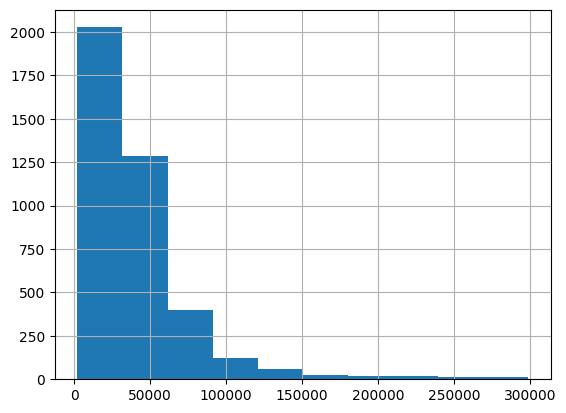

In [12]:
# We want to display the price, but it is in object type(string type)
price = df["price"]
price = price.str.replace("$", "") # We are replacing $ with nothing
price = price.str.replace(",", "") # We are replacing , with nothing
price = price.astype(int) # We are changing data type to integer
print(price[price < 300000])
price[price < 300000].hist()

In [13]:
df["price"] = price
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [16]:
print(price.mean())
print(df["price"].mean())
df["price"].mean()

44553.190321776005
44553.190321776005


np.float64(44553.190321776005)

In [20]:
print(df["brand"])
print(df["brand"] == "Hyundai")

df_hyundai = df[df["brand"] == "Hyundai"]
print(df_hyundai["price"].mean())

df_ford = df[df["brand"] == "Ford"]
print(df_ford["price"].mean())

0           Ford
1        Hyundai
2          Lexus
3       INFINITI
4           Audi
          ...   
4004     Bentley
4005        Audi
4006     Porsche
4007        Ford
4008         BMW
Name: brand, Length: 4009, dtype: object
0       False
1        True
2       False
3       False
4       False
        ...  
4004    False
4005    False
4006    False
4007    False
4008    False
Name: brand, Length: 4009, dtype: bool
18946.875
36240.88082901554


In [21]:
pd.get_dummies(df["brand"])

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4005,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [23]:
df[["model_year", "price"]].corr()

,model_year,price
model_year,1.000000,0.199496
price,0.199496,1.000000


In [24]:
# Example
df2 = pd.DataFrame(data={"model_year": [1, 1, 2], "price": [1, 2, 3]})
print(df2)
df2.corr()

   model_year  price
0           1      1
1           1      2
2           2      3


,model_year,price
model_year,1.000000,0.866025
price,0.866025,1.000000


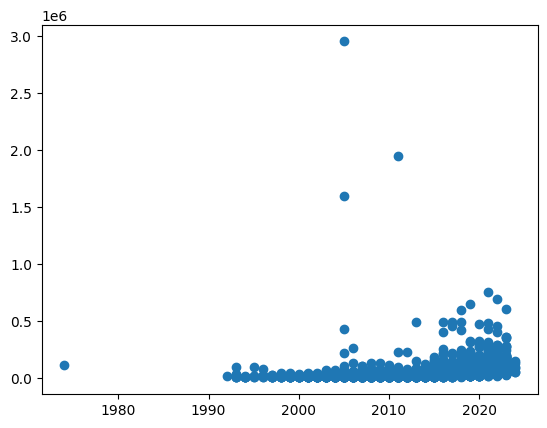

In [26]:
# Just checking how model year affecting price
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["model_year"], df["price"])
plt.show()

In [27]:
age = df["model_year"].max() - df["model_year"]
print(age)

0       11
1        3
2        2
3        9
4        3
        ..
4004     1
4005     2
4006     2
4007     4
4008     4
Name: model_year, Length: 4009, dtype: int64


In [28]:
milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)
print(milage)

0       51000
1       34742
2       22372
3       88900
4        9835
        ...  
4004      714
4005    10900
4006     2116
4007    33000
4008    43000
Name: milage, Length: 4009, dtype: int64


### Gather main code

In [8]:
import pandas as pd
import torch
from torch import nn

# Pandas: Reading the data
df = pd.read_csv("./data/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

In [ ]:
# Torch: Creating X and y data (as tensors)
# X = torch.tensor([age, milage]) # Logic is correct, but program wise it is not the right way. We should not send like this..
# print(X) # You can check it by printing
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])

# y = torch.tensor(price) # This will not work 
# print(y) # Because the output will be like [1,2,..]. it should be like [[1],[2]..].
y = torch.tensor(price, dtype=torch.float32).reshape((-1, 1)) # We can also keep 4009 rows instead of -1
model = nn.Linear(2, 1)  # 2 inputs(age, milage), we need 1 output(price)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.00000000001)

for i in range(0, 1000):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    print(loss)
    #if i % 100 == 0: 
    #    print(model.bias)
    #    print(model.weight)

prediction = model(torch.tensor([
    [5, 20000]
], dtype=torch.float32)) # 5 years old, 10000 miles and 20000 miles here
print(prediction)

tensor(7.8815e+09, grad_fn=<MseLossBackward0>)
tensor(7.8597e+09, grad_fn=<MseLossBackward0>)
tensor(7.8435e+09, grad_fn=<MseLossBackward0>)
tensor(7.8315e+09, grad_fn=<MseLossBackward0>)
tensor(7.8225e+09, grad_fn=<MseLossBackward0>)
tensor(7.8159e+09, grad_fn=<MseLossBackward0>)
tensor(7.8110e+09, grad_fn=<MseLossBackward0>)
tensor(7.8073e+09, grad_fn=<MseLossBackward0>)
tensor(7.8046e+09, grad_fn=<MseLossBackward0>)
tensor(7.8026e+09, grad_fn=<MseLossBackward0>)
tensor(7.8011e+09, grad_fn=<MseLossBackward0>)
tensor(7.8000e+09, grad_fn=<MseLossBackward0>)
tensor(7.7992e+09, grad_fn=<MseLossBackward0>)
tensor(7.7986e+09, grad_fn=<MseLossBackward0>)
tensor(7.7981e+09, grad_fn=<MseLossBackward0>)
tensor(7.7978e+09, grad_fn=<MseLossBackward0>)
tensor(7.7975e+09, grad_fn=<MseLossBackward0>)
tensor(7.7974e+09, grad_fn=<MseLossBackward0>)
tensor(7.7972e+09, grad_fn=<MseLossBackward0>)
tensor(7.7971e+09, grad_fn=<MseLossBackward0>)
tensor(7.7970e+09, grad_fn=<MseLossBackward0>)
tensor(7.7970

Remember if you are getting nan, the model is not training because of large numbers, so decrease the learning rate from 0.0001 to 0.000001 ...
print the loss value to check if it is actually training correctly or not.

- Decrease the loss as much as possible by decreasing the learning rate i.e. from 0.001 to 0.00001..  Remember if you print the loss it should be in decimals not e+1, +2,.... +20.. 

In [11]:
prediction = model(torch.tensor([
    [5, 10000]
], dtype=torch.float32)) # 5 years old, 10000 miles here
print(prediction)

prediction = model(torch.tensor([
    [5, 20000]
], dtype=torch.float32)) # 5 years old, 20000 miles here
print(prediction)

tensor([[2349.7166]], grad_fn=<AddmmBackward0>)
tensor([[4698.3154]], grad_fn=<AddmmBackward0>)


price is increasing after increase in miles. It is not correct.
We need to normalize the data

Neuron normalising.. 1st time check 

In [12]:
import sys
import pandas as pd
import torch
from torch import nn

# Pandas: Reading the data
df = pd.read_csv("./data/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
# sys.exit()


model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0000000001)

for i in range(0, 1000):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    # print(loss)
    #if i % 100 == 0: 
    #    print(model.bias)
    #    print(model.weight)

prediction = model(torch.tensor([
    [5, 10000]
], dtype=torch.float32))
print(prediction * y_std + y_mean)

tensor([[156448.5469]], grad_fn=<AddBackward0>)


In [13]:
prediction = model(torch.tensor([
    [5, 20000]
], dtype=torch.float32))
print(prediction * y_std + y_mean)

tensor([[130128.7344]], grad_fn=<AddBackward0>)


Improve the normalization

In [ ]:
import sys
import pandas as pd
import torch
from torch import nn


# Pandas: Reading the data
df = pd.read_csv("./data/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
# sys.exit()


model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for i in range(0, 10000):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0: 
        print(loss)
    # if i % 100 == 0: 
    #    print(model.bias)
    #    print(model.weight)


X_data = torch.tensor([
    [5, 10000],
    [2, 10000],
    [5, 20000]
], dtype=torch.float32)

prediction = model((X_data - X_mean) / X_std)
print(prediction * y_std + y_mean)

In [16]:
import sys
import pandas as pd
import torch
from torch import nn

# Pandas: Reading the data
df = pd.read_csv("./data/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
# X_mean = X.mean # This is wrong, It will take all the variables in the 2 columns. 
X_mean = X.mean(axis=0) # This is right, It will take all the variables in the 2 columns individually. Same goes for standard deviation 
X_std = X.std(axis=0) 
X = (X - X_mean) / X_std

y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
# sys.exit()


model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for i in range(0, 10000):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0: 
        print(loss)
    # if i % 100 == 0: 
    #    print(model.bias)
    #    print(model.weight)


X_data = torch.tensor([
    [5, 10000], # 5 years, 10k miles
    [5, 20000], # 5 years, 20k miles
    [2, 10000], # 2 years, 10k miles
    [2, 20000]  # 2 years, 20k miles    
], dtype=torch.float32) 

prediction = model((X_data - X_mean) / X_std)
print(prediction * y_std + y_mean)

tensor(1.1921, grad_fn=<MseLossBackward0>)
tensor(1.1228, grad_fn=<MseLossBackward0>)
tensor(1.0770, grad_fn=<MseLossBackward0>)
tensor(1.0448, grad_fn=<MseLossBackward0>)
tensor(1.0209, grad_fn=<MseLossBackward0>)
tensor(1.0024, grad_fn=<MseLossBackward0>)
tensor(0.9876, grad_fn=<MseLossBackward0>)
tensor(0.9754, grad_fn=<MseLossBackward0>)
tensor(0.9652, grad_fn=<MseLossBackward0>)
tensor(0.9567, grad_fn=<MseLossBackward0>)
tensor(0.9494, grad_fn=<MseLossBackward0>)
tensor(0.9432, grad_fn=<MseLossBackward0>)
tensor(0.9380, grad_fn=<MseLossBackward0>)
tensor(0.9334, grad_fn=<MseLossBackward0>)
tensor(0.9296, grad_fn=<MseLossBackward0>)
tensor(0.9263, grad_fn=<MseLossBackward0>)
tensor(0.9234, grad_fn=<MseLossBackward0>)
tensor(0.9210, grad_fn=<MseLossBackward0>)
tensor(0.9189, grad_fn=<MseLossBackward0>)
tensor(0.9171, grad_fn=<MseLossBackward0>)
tensor(0.9156, grad_fn=<MseLossBackward0>)
tensor(0.9142, grad_fn=<MseLossBackward0>)
tensor(0.9131, grad_fn=<MseLossBackward0>)
tensor(0.91

So now it is predicting good.
Now do we need somany iterations to train. can we stop at 1000 instead of going till 10000. 
We can use matplotlib to visualize the output.

[1.4429374933242798, 1.423111081123352, 1.4041051864624023, 1.3858835697174072, 1.3684110641479492, 1.3516545295715332, 1.3355823755264282, 1.3201639652252197, 1.305370807647705, 1.2911748886108398, 1.2775511741638184, 1.264473795890808, 1.2519192695617676, 1.2398648262023926, 1.2282893657684326, 1.2171716690063477, 1.2064920663833618, 1.1962319612503052, 1.1863733530044556, 1.1768991947174072, 1.1677931547164917, 1.1590396165847778, 1.1506237983703613, 1.1425312757492065, 1.1347485780715942, 1.127262830734253, 1.1200615167617798, 1.1131329536437988, 1.1064655780792236, 1.1000486612319946, 1.0938720703125, 1.0879257917404175, 1.0822004079818726, 1.0766868591308594, 1.0713763236999512, 1.0662609338760376, 1.0613325834274292, 1.0565836429595947, 1.052006721496582, 1.0475951433181763, 1.0433425903320312, 1.039242148399353, 1.0352879762649536, 1.0314743518829346, 1.027795672416687, 1.0242464542388916, 1.0208216905593872, 1.0175166130065918, 1.0143264532089233, 1.0112465620040894, 1.0082727

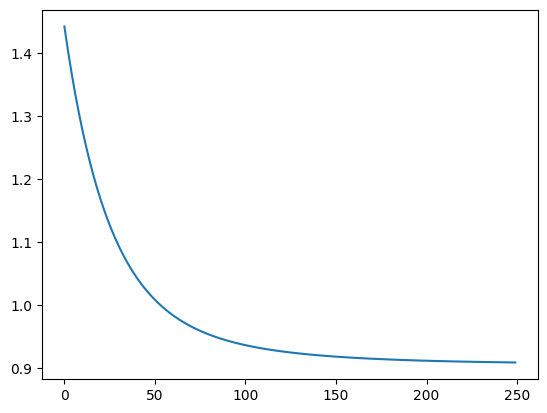

tensor([[67245.8750],
        [70048.0234],
        [63636.6328]], grad_fn=<AddBackward0>)


In [17]:
import sys
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

# Pandas: Reading the data
df = pd.read_csv("./data/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
# sys.exit()


model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []
for i in range(0, 250):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    #if i % 100 == 0: 
    #    print(loss.item())
    # if i % 100 == 0: 
    #    print(model.bias)
    #    print(model.weight)
print(losses)
plt.plot(losses)
plt.show()

X_data = torch.tensor([
    [5, 10000],
    [2, 10000],
    [5, 20000]
], dtype=torch.float32)

prediction = model((X_data - X_mean) / X_std)
print(prediction * y_std + y_mean)

How to save a model

In [18]:
import sys
import os
import pandas as pd
import torch
from torch import nn

# Pandas: Reading the data
df = pd.read_csv("./data/used_cars.csv")

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

if not os.path.isdir("./model"):
    os.mkdir("./model")

# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
torch.save(X_mean, "./model/X_mean.pt")
torch.save(X_std, "./model/X_std.pt")
X = (X - X_mean) / X_std

y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
torch.save(y_mean, "./model/y_mean.pt")
torch.save(y_std, "./model/y_std.pt")
y = (y - y_mean) / y_std
# sys.exit()


model = nn.Linear(2, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for i in range(0, 2500):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    #if i % 100 == 0: 
    #    print(loss)

torch.save(model.state_dict(), "./model/model.pt")

In [20]:
import sys
import pandas as pd
import torch
from torch import nn

X_mean = torch.load("./model/X_mean.pt", weights_only=True)
X_std = torch.load("./model/X_std.pt", weights_only=True)
y_mean = torch.load("./model/y_mean.pt", weights_only=True)
y_std = torch.load("./model/y_std.pt", weights_only=True)

model = nn.Linear(2, 1)
print(
    torch.load("./model/model.pt", weights_only=True)
)

model.load_state_dict(
    torch.load("./model/model.pt", weights_only=True)
)
model.eval()

X_data = torch.tensor([
    [5, 10000],
    [2, 10000],
    [5, 20000]
], dtype=torch.float32)

with torch.no_grad():
    prediction = model((X_data - X_mean) / X_std)
    print(prediction * y_std + y_mean)

OrderedDict({'weight': tensor([[-0.0174, -0.2948]]), 'bias': tensor([1.5026e-08])})
tensor([[69611.1719],
        [70284.5312],
        [65174.5898]])


Exercise - Considering "accident" column

In [21]:
import pandas as pd

df = pd.read_csv("data/used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [24]:
df["accident"] == "None reported"

0       False
1       False
2        True
3        True
4        True
        ...  
4004     True
4005     True
4006     True
4007     True
4008    False
Name: accident, Length: 4009, dtype: bool

In [22]:
accident_free = df["accident"] == "None reported"

In [23]:
accident_free.astype(int)

0       0
1       0
2       1
3       1
4       1
       ..
4004    1
4005    1
4006    1
4007    1
4008    0
Name: accident, Length: 4009, dtype: int64

In [25]:
import sys
import pandas as pd
import torch
from torch import nn

# Pandas: Preparing the data
age = df["model_year"].max() - df["model_year"]

milage = df["milage"]
milage = milage.str.replace(",", "")
milage = milage.str.replace(" mi.", "")
milage = milage.astype(int)

price = df["price"]
price = price.str.replace("$", "")
price = price.str.replace(",", "")
price = price.astype(int)

In [26]:
# Torch: Creating X and y data (as tensors)
X = torch.column_stack([
    torch.tensor(accident_free, dtype=torch.float32),
    torch.tensor(age, dtype=torch.float32),
    torch.tensor(milage, dtype=torch.float32)
])
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

y = torch.tensor(price, dtype=torch.float32)\
    .reshape((-1, 1))
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
# sys.exit()


model = nn.Linear(3, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for i in range(0, 10000):
    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0: 
        print(loss)
    # if i % 100 == 0: 
    #    print(model.bias)
    #    print(model.weight)


X_data = torch.tensor([
    [1, 5, 10000],
    [1, 2, 10000],
    [1, 5, 20000]
], dtype=torch.float32)

prediction = model((X_data - X_mean) / X_std)
print(prediction * y_std + y_mean)

X_data_accident = torch.tensor([
    [0, 5, 10000],
    [0, 2, 10000],
    [0, 5, 20000]
], dtype=torch.float32)

prediction_accident = model((X_data_accident - X_mean) / X_std)
print(prediction_accident * y_std + y_mean)

tensor(0.9783, grad_fn=<MseLossBackward0>)
tensor(0.9555, grad_fn=<MseLossBackward0>)
tensor(0.9405, grad_fn=<MseLossBackward0>)
tensor(0.9305, grad_fn=<MseLossBackward0>)
tensor(0.9237, grad_fn=<MseLossBackward0>)
tensor(0.9189, grad_fn=<MseLossBackward0>)
tensor(0.9156, grad_fn=<MseLossBackward0>)
tensor(0.9132, grad_fn=<MseLossBackward0>)
tensor(0.9115, grad_fn=<MseLossBackward0>)
tensor(0.9102, grad_fn=<MseLossBackward0>)
tensor(0.9093, grad_fn=<MseLossBackward0>)
tensor(0.9086, grad_fn=<MseLossBackward0>)
tensor(0.9080, grad_fn=<MseLossBackward0>)
tensor(0.9076, grad_fn=<MseLossBackward0>)
tensor(0.9073, grad_fn=<MseLossBackward0>)
tensor(0.9070, grad_fn=<MseLossBackward0>)
tensor(0.9068, grad_fn=<MseLossBackward0>)
tensor(0.9066, grad_fn=<MseLossBackward0>)
tensor(0.9065, grad_fn=<MseLossBackward0>)
tensor(0.9064, grad_fn=<MseLossBackward0>)
tensor(0.9063, grad_fn=<MseLossBackward0>)
tensor(0.9062, grad_fn=<MseLossBackward0>)
tensor(0.9061, grad_fn=<MseLossBackward0>)
tensor(0.90